# Classificação - K-médias
# _____________________________________

#### Algoritmo de aprendizado não supervisionado que busca similaridades entre os dados e tenta agrupá-los conforme o número de clusters/grupos definidos pelo argumento "k", onde, a semelhanca entre os pontos é calculada por uma função de distância.

## Importando bibliotecas ##

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.decomposition import PCA

In [3]:
import warnings
warnings.filterwarnings("ignore")

## Carregando a base de dados iris

In [4]:
iris = pd.read_csv("data/iris.csv")

In [5]:
iris.sample(5)

SepalLength  SepalWidth  PetalLength  PetalWidth          Species
41           4.5         2.3          1.3         0.3      Iris-setosa
120          6.9         3.2          5.7         2.3   Iris-virginica
62           6.0         2.2          4.0         1.0  Iris-versicolor
106          4.9         2.5          4.5         1.7   Iris-virginica
3            4.6         3.1          1.5         0.2      Iris-setosa

## Normalizando o Dataframe

In [7]:
def normalize(df):
    resultado = df.copy()
    for coluna in df.columns:
        if type(df[coluna][1]) != str:
            max_valor = df[coluna].max()
            min_valor = df[coluna].min()
            resultado[coluna] = (df[coluna] - min_valor) / (max_valor - min_valor)
    return resultado

df = normalize(iris)

#### Guardando os valores originais e atualizando o dataframe

In [8]:
chave_normalizacao = iris # se for uma base de dados maior, é melhor guardar
 							#apenas os valores máximos e mínimos de cada coluna
iris = df

In [9]:
iris.sample(5)


SepalLength  SepalWidth  PetalLength  PetalWidth          Species
13      0.000000    0.416667     0.016949    0.000000      Iris-setosa
147     0.611111    0.416667     0.711864    0.791667   Iris-virginica
78      0.472222    0.375000     0.593220    0.583333  Iris-versicolor
20      0.305556    0.583333     0.118644    0.041667      Iris-setosa
129     0.805556    0.416667     0.813559    0.625000   Iris-virginica

#### Visualização  do dataset antes e depois da normalização

In [10]:
rotulos = []
for linha, coluna in iris.iterrows():
    if coluna['Species'] == 'Iris-virginica':
        rotulos.append(0)
    elif coluna['Species'] == 'Iris-setosa':
        rotulos.append(1)
    elif coluna['Species'] == 'Iris-versicolor':
        rotulos.append(2)

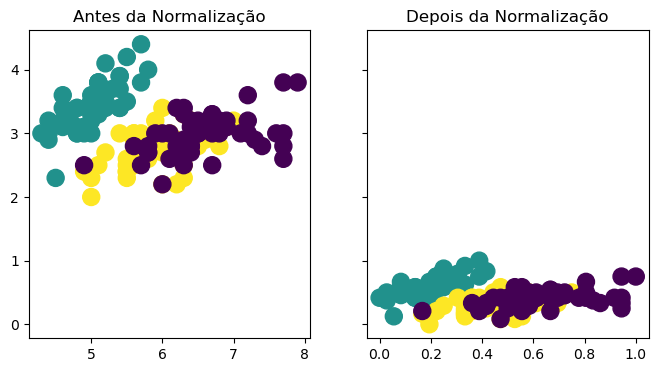

In [11]:
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8,4))
ax1.set_title('Antes da Normalização')
ax1.scatter(chave_normalizacao['SepalLength'], chave_normalizacao['SepalWidth'],s=150, c=rotulos)
ax2.set_title('Depois da Normalização')
ax2.scatter(iris['SepalLength'], iris['SepalWidth'],s=150, c=rotulos)

## Separando os valores de dados e classes

In [12]:
X = iris.drop('Species',axis=1)
X[:10]

SepalLength  SepalWidth  PetalLength  PetalWidth
0     0.222222    0.625000     0.067797    0.041667
1     0.166667    0.416667     0.067797    0.041667
2     0.111111    0.500000     0.050847    0.041667
3     0.083333    0.458333     0.084746    0.041667
4     0.194444    0.666667     0.067797    0.041667
5     0.305556    0.791667     0.118644    0.125000
6     0.083333    0.583333     0.067797    0.083333
7     0.194444    0.583333     0.084746    0.041667
8     0.027778    0.375000     0.067797    0.041667
9     0.166667    0.458333     0.084746    0.000000

In [13]:
y = iris.Species
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## Análise da Componente Principal

In [14]:
pca = PCA()
X_iris = pca.fit_transform(X)
pca.get_covariance()
variancias = pca.explained_variance_ratio_
variancias

array([0.84141901, 0.11732474, 0.03490564, 0.00635061])

In [15]:
# No caso, das 4 componentes listadas, vou considerar apenas as 3 primeiras
# descartar o 0.006
pca = PCA(n_components=3)
X_iris = pca.fit_transform(X)

## Convertendo valores categórios de classe em numéricos

In [16]:
def converte_classe(l):
    if l == 'Iris-virginica':
        return 0
    elif l == 'Iris-setosa':
        return 1
    elif l == 'Iris-versicolor':
        return 2

In [17]:
y = y.apply(converte_classe)
y.value_counts()

1    50
2    50
0    50
Name: Species, dtype: int64

## Inicialização Aleatória, Instânciando o Algoritmo K-means com 3 clusters ##

In [18]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++')

In [19]:
kmeans.fit(X_iris)

KMeans(n_clusters=3)

## Centróides ##

#### Pontos centrais dos clusters, que servirão para calcular a distância entre os dados 

In [20]:
kmeans.cluster_centers_

array([[-0.61793459,  0.0687501 ,  0.00066288],
       [ 0.15033267, -0.12192287, -0.00470709],
       [ 0.55708812,  0.10255872,  0.00651252]])

## Tabela de distância (Euclidiana) ##

In [21]:
distancia = kmeans.fit_transform(X_iris)
distancia

array([[0.04794285, 1.18771607, 0.8149518 ],
       [0.17577572, 1.19913766, 0.77534155],
       [0.12875836, 1.23608234, 0.82394228],
       [0.1732618 , 1.22847864, 0.80585368],
       [0.07690985, 1.20590339, 0.83996948],
       [0.24104644, 1.10786261, 0.8010768 ],
       [0.11415906, 1.2197643 , 0.82414868],
       [0.01689925, 1.18360838, 0.79729872],
       [0.27419897, 1.26973569, 0.83131779],
       [0.14787671, 1.21640136, 0.80052342],
       [0.16173115, 1.16116463, 0.82314992],
       [0.0461046 , 1.19789734, 0.80552016],
       [0.19319299, 1.2394622 , 0.81412057],
       [0.27577288, 1.33789316, 0.90579617],
       [0.3269856 , 1.19328454, 0.90762203],
       [0.45696192, 1.18321266, 0.95029824],
       [0.2346927 , 1.14984731, 0.83940152],
       [0.04543256, 1.16053745, 0.78905392],
       [0.25383398, 1.09577218, 0.78978592],
       [0.16192262, 1.1753027 , 0.83781161],
       [0.11818469, 1.11911594, 0.74886504],
       [0.13665471, 1.13956496, 0.7932198 ],
       [0.

In [22]:
distancia[0]

array([0.04794285, 1.18771607, 0.8149518 ])

## Visualizando valores de distância para cada cluster ##

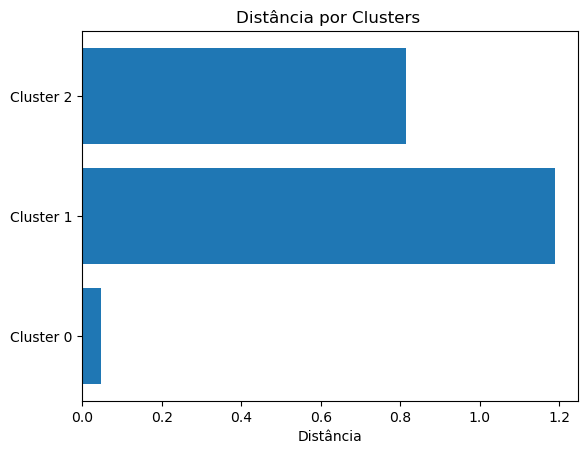

In [23]:
plt.figure()
X = ['Cluster 0','Cluster 1','Cluster 2']
plt.barh(X,distancia[0])
plt.xlabel('Distância')
plt.title('Distância por Clusters ')
plt.show()

## Imprimindo Rótulos ##

In [24]:
labels = kmeans.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

## Visualizando os Centroides ##

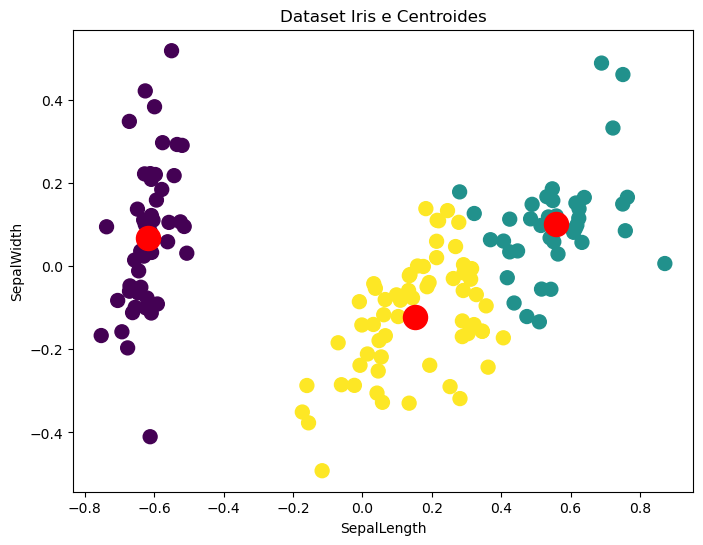

In [25]:
plt.figure(figsize=(8,6))
plt.scatter(X_iris[:, 0], X_iris[:, 1], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red',label = 'Centroids')
plt.title('Dataset Iris e Centroides')
plt.xlabel('SepalLength')
plt.ylabel('SepalWidth')
plt.show()

## Agrupando novos dados ##

In [26]:
novos_dados = [
        [ 4.12, 3.4, 1.6],
        [ 5.2, 5.8, 5.2],
        [ 3.1, 3.5, 3.3]
    ]


### Escalando os novos dados

In [27]:
# aqui a gambiarra la do inicio
for i in novos_dados:
    col0 = chave_normalizacao['SepalLength']
    col1 = chave_normalizacao['SepalWidth']
    col2 = chave_normalizacao['PetalLength']
    #col3 = chave_normalizacao['PetalWidth']
    i[0] = (i[0] - col0.min()) / (col0.max() - col0.min()) 
    i[1] = (i[1] - col1.min()) / (col1.max() - col1.min()) 
    i[2] = (i[2] - col2.min()) / (col2.max() - col2.min()) 
    #i[3] = (i[3] - col3.min()) / (col3.max() - col3.min()) 

In [28]:
novos_dados

[[-0.04999999999999991, 0.5833333333333333, 0.1016949152542373],
 [0.25000000000000006, 1.583333333333333, 0.711864406779661],
 [-0.3333333333333332, 0.6249999999999999, 0.38983050847457623]]

In [29]:
kmeans.predict(novos_dados)

array([2, 1, 0])

## Visualizando os resultados ##

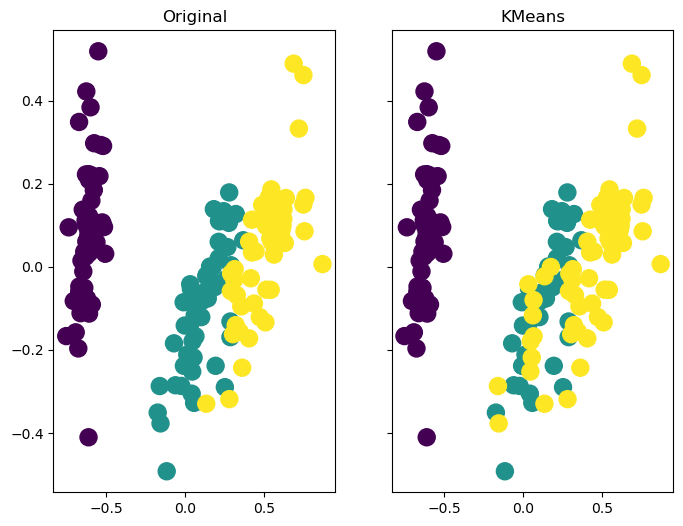

In [30]:
f,(ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8,6))
ax1.set_title('Original')
ax1.scatter(X_iris[:, 0], X_iris[:, 1],s=150,c=sorted(y))
ax2.set_title('KMeans')
ax2.scatter(X_iris[:, 0], X_iris[:, 1],s=150,c=sorted(kmeans.labels_))
plt.show()

## Estimando o valor do parametro K - Curva Joelho/cotovelo (Elbow)

#### A primeira "dobra" aparece com 2 clusters, e "dobra" final é observada com 3 grupos.

1 40.876919630146936
2 11.88415681859686
3 6.746281529292708
4 5.282487103738497
5 4.327404567020967
6 3.6920583123857864
7 3.2843846806492882
8 2.9753992967251075
9 2.6190512664803833
10 2.4795063237014636


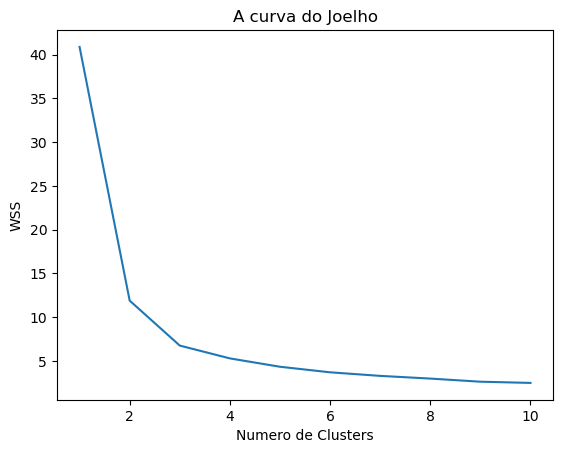

In [32]:
wcss = []

for i in range(1, 11):
    kmeans2 = KMeans(n_clusters = i, init = 'random')
    kmeans2.fit(X_iris)
    print (i,kmeans2.inertia_)
    wcss.append(kmeans2.inertia_)
    
plt.figure()
plt.plot(range(1, 11), wcss)
plt.title('A curva do Joelho')
plt.xlabel('Numero de Clusters')
plt.ylabel('WSS') # do ingles: within cluster sum of squares = dentro da soma dos quadrados do cluster
plt.show()

## Técnicas de Validação

### Matriz de Confusão

In [33]:
print (pd.crosstab(y,kmeans.labels_, rownames=['Real'], colnames=['Predito'], margins=True))

Predito   0   1   2  All
Real                    
0         0  36  14   50
1        50   0   0   50
2         0   3  47   50
All      50  39  61  150


#### classe 0 = 72%    ->  Iris-virginica
#### classe 1 = 100%  ->  Iris-setosa
#### classe 2 = 94%    ->  Iris-versicolor

### Metricas de classificação

In [34]:
clusters = ['Cluster 2','Cluster 1','Cluster 0']
print(metrics.classification_report(y,kmeans.labels_,target_names=clusters))

              precision    recall  f1-score   support

   Cluster 2       0.00      0.00      0.00        50
   Cluster 1       0.00      0.00      0.00        50
   Cluster 0       0.77      0.94      0.85        50

    accuracy                           0.31       150
   macro avg       0.26      0.31      0.28       150
weighted avg       0.26      0.31      0.28       150

